In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
city_data = pd.read_csv("city_data.csv")
ride_data = pd.read_csv("ride_data.csv")

# Combine the data into a single dataset
data_complete = pd.merge(city_data, ride_data, how="left", on=["city", "city"])

# Display the data table for preview
data_complete.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [3]:
sub_city = data_complete[data_complete["type"] =="Suburban"]
sub_driver = sub_city.groupby(["city"])
sub_driver_count = sub_driver["driver_count"].sum()
sub_avg = sub_driver["fare"].mean()
sub_rides = sub_driver["ride_id"].count()

In [4]:
# scatterplot by city type - 3 for each variable, driver count is marker size, x = total rides, y = avg fare

urban_city = data_complete[data_complete["type"] =="Urban"]
urban_driver = urban_city.groupby(["city"])
urban_driver_count = urban_driver["driver_count"].sum()
urban_avg = urban_driver["fare"].mean()
urban_rides = urban_driver["ride_id"].count()

In [5]:
rural_city = data_complete[data_complete["type"] =="Rural"]
rural_driver = rural_city.groupby(["city"])
rural_driver_count = rural_driver["driver_count"].sum()
rural_avg = rural_driver["fare"].mean()
rural_rides = rural_driver["ride_id"].count()

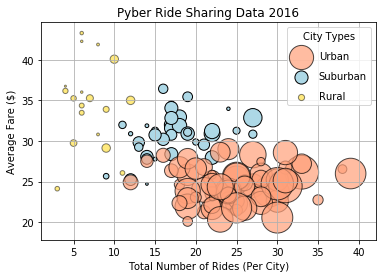

In [6]:

sub = plt.scatter(sub_rides, sub_avg, marker="o", s=sub_driver_count/2, facecolors="lightblue", edgecolors="black")
rural = plt.scatter(rural_rides, rural_avg, marker="o", s=rural_driver_count, facecolors="gold", edgecolors="black", alpha=0.5)
urban = plt.scatter(urban_rides, urban_avg, marker="o", s=urban_driver_count/2, facecolors="lightsalmon", edgecolors="black", alpha=0.7 )
# Create a legend
# plt.legend((lo, ll, l, a, h, hh, ho),
#            ('Low Outlier', 'LoLo', 'Lo', 'Average', 'Hi', 'HiHi', 'High Outlier'),
#            scatterpoints=1,
#            loc='lower left',
#            ncol=3,
#            fontsize=8)

legend = plt.legend((urban, sub, rural), ('Urban', 'Suburban', 'Rural'),
            title="City Types", fancybox=True, labelspacing=1)

plt.axis('tight')
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

## Total Fares by City Typesxz

In [8]:
ride_sharing = data_complete[["driver_count", "fare","type", "city"]]


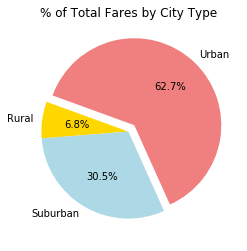

<Figure size 432x288 with 0 Axes>

In [9]:

total_cost = ride_sharing["fare"].sum()

typegroup1 = ride_sharing.groupby(["type"])
type_number_fare = typegroup1["fare"].sum()


type_list1 = type_number_fare.keys()
explode = (0,0,0.1)
colors = ["gold", "lightblue", "lightcoral"]


plt.pie(type_number_fare, labels=type_list1, colors=colors, autopct="%1.1f%%", startangle=160,explode=explode)

plt.title("% of Total Fares by City Type")

plt.show()

plt.savefig("totalfaresbycitytype.png")

## Total Rides by City Type

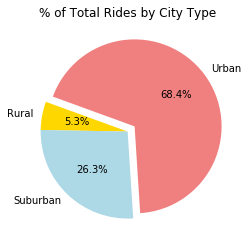

<Figure size 432x288 with 0 Axes>

In [15]:
# Calculate Ride Percents
total_rides = ride_sharing["fare"].count()

typegroup = ride_sharing.groupby(["type"])
type_number = typegroup["fare"].count()
type_list = type_number.keys()
explode = (0,0,0.1)
colors = ["gold", "lightblue", "lightcoral"]

# Build Pie Chart
plt.pie(type_number, labels=type_list, colors=colors, autopct="%1.1f%%", startangle=160,explode=explode)

plt.title("% of Total Rides by City Type")
plt.show()

# Save Figure
plt.savefig("totalridesbycitytype.png")

## Total Drivers by City Type

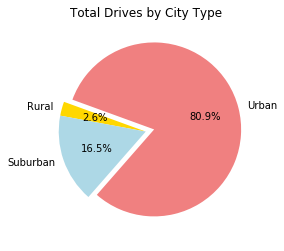

<Figure size 432x288 with 0 Axes>

In [16]:
# Calculate Driver Percents
driver_total = city_data["driver_count"].sum()

drivers = city_data.groupby(["type"])
drivers_count = drivers["driver_count"].sum()

# Build Pie Charts
type_list = drivers_count.keys()
explode = (0,0,0.1)
colors = ["gold", "lightblue", "lightcoral"]

# Build Pie Chart
plt.pie(drivers_count, labels=type_list, colors=colors, autopct="%1.1f%%", startangle=160,explode=explode)
plt.title("Total Drives by City Type")
plt.show()
# Save Figure
plt.savefig("totaldriversbycitytype.png")